# Predicting Likelihood of Having Heart Disease
# Gideon Oyedokun

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ModelSelection
import seaborn as sns
import pickle

# Sikit Imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
db = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

## Performing Simple EDA on the dataset

In [3]:
# Checking the first five rows of the dataset
db.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# Checking the last five rows of the dataset
db.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [5]:
# Checking the shape of the dataset
db.shape

(1190, 12)

In [6]:
# Checking the uniqe values for the dataset columns
db.nunique()

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

### Cleaning the data

In [7]:
# Checking for the null values
db.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

### Removing Duplicates in the dataset

In [8]:
db.drop_duplicates()
db.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


### Relationship Analysis

<AxesSubplot:>

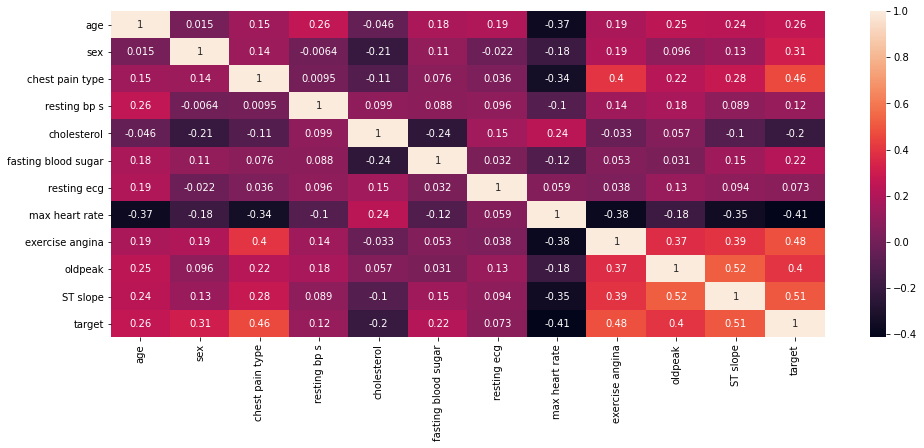

In [9]:
corelation = db.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(corelation, xticklabels=corelation.columns, 
            yticklabels=corelation.columns, annot=True)

Looking closely at the data the variables that are not useful are the ones that are below 0.25 in the corelation level. *[Note: 1 means high corelation and -0.4 mean no statical corelation].* And thoes are :

`
resting bp s
cholesterol
fasting blood sugar
resting ecg
max heart rate
`

# Getting Useful Vairables

>- age,
>- oldpeak,
>- chest_pain_type,
>- exercise_angina,
>- ST_slope,
>- sex,

## Understanding the AGE vairable 

In [10]:
db['age'].describe()

count    1190.000000
mean       53.720168
std         9.358203
min        28.000000
25%        47.000000
50%        54.000000
75%        60.000000
max        77.000000
Name: age, dtype: float64

#### Based on research done with age and CVD, it is clear that the older an individual get, the more liekly they are to suffer from Heart Disease. Age is directly linnked with weakening body tissues, which inturn affects the mussles of the heart and the way it pumps. Also related to age is a symptom klnow as arrhythmia - irregular beating patterns in the heart. It has been seen that as one ages, the eletrical signals that contract the heart muscells weaken; therfore, reducing the fuction of the heart altogether. Typically these chages can be seen as individuals get to their sixties.

#### So, understanding this fact, it was clear that we should look at the dataset and see just how difuesed the age is and to see how many people in the dataset are at, or above the age 60.

### Note: sex is binary where 1 = Male; 0 = Female
### Note: target is binary where 1 = heart Disease; 0 = normal

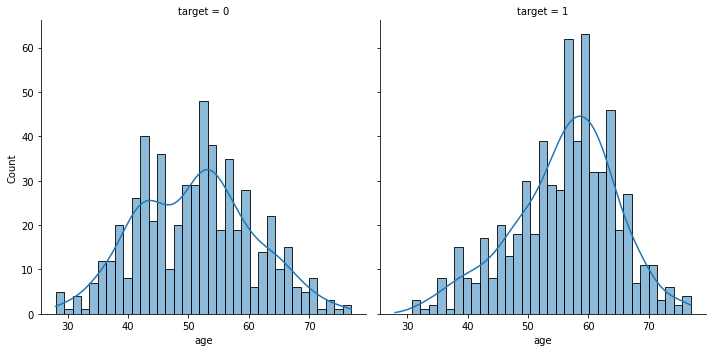

In [11]:
# Getting the distribution of the age values
sns.displot(data=db, x="age", col="target", kde=True, bins=35)

##### So just from looking at the relational plot of age and gender, it is evident that with this dataset, males are more likely to have heart disease as they age compared to their female counterparts.

#### Nonetheless, the general statistics that say individuals around 60 and older have a higher chance of having heart disease holds true for our dataset, as the cases for heart disease seem to spike as the age approaches 60 and interestingly falls as it passes the 60-year mark. I'm curious if at around that age more individuals start to take better care of their health and suffer heart disease less, or if other diseases take them beforehand.

## Understanding the OLDPEAK vairable 

In [12]:
db['oldpeak'].describe()

count    1190.000000
mean        0.922773
std         1.086337
min        -2.600000
25%         0.000000
50%         0.600000
75%         1.600000
max         6.200000
Name: oldpeak, dtype: float64

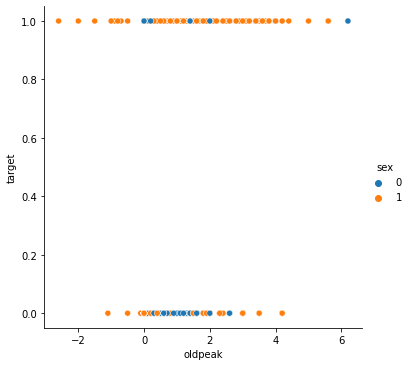

In [13]:
## Looking at the relationship with oldpeak and the target for both male and female
sns.relplot(x='oldpeak', y='target', hue='sex', data=db)

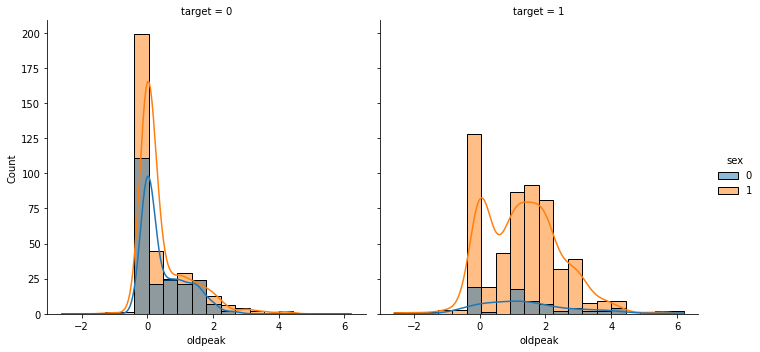

In [14]:
# Getting the distribution of the Oldpeak values
sns.displot(data=db, x="oldpeak", col="target", hue="sex", kde=True, bins=20)

#### From the data, it semse like men with oldpeak greater than ***1*** and less than ***4*** have a high chance of having heart disease. However, it's hard to say the same for women because, it's hard to say if there is a correlation with oldpeak and heart disease for women.

# Building a Model with the Vairabels we have right Now before making the neural Network

In [15]:
# Creating a Helper Function to Calculate probability
def probability(feature,target, database):
    # Defining variables
    sector_counts = db[feature].value_counts().count()
    
    # Defining vairables
    feature_list = (list(db[feature]))
    target_list = (list(db[target]))
    
    zero_count = 0
    one_count = 0
    
    # Vairables to find the sector with the greatest probablity
    prime_sector_hd = 0
    prime_sector_not_hd = 0
    
    max_probability_hd = 0
    max_probability_not_hd = 0
    
    
    # Based on the sector... 
    for sector in range(1, sector_counts+1):
        zero_count = 0
        one_count = 0
        # Run the loop to figure out counts
        for i in range(len(feature_list)):
            if feature_list[i] == sector and target_list[i] == 0:
                zero_count += 1
            elif feature_list[i] == sector and target_list[i] == 1:
                one_count += 1
                
        if one_count == 0 or zero_count == 0:
            if one_count == 0 and zero_count != 0:
                hd_p = 0
                not_hd_p = round(zero_count/(zero_count+one_count) * 100, 2)
            elif zero_count == 0 and one_count != 0:
                not_hd_p = 0
                hd_p = round(one_count/(zero_count+one_count) * 100, 2)
            else:
                hd_p = 0
                not_hd_p = 0
        else:
            not_hd_p = round(zero_count/(zero_count+one_count) * 100, 2)
            hd_p = round(one_count/(zero_count+one_count) * 100, 2)
                
        if max_probability_hd < hd_p:
            max_probability_hd = hd_p
            prime_sector_hd = sector

        if max_probability_not_hd < not_hd_p:
            max_probability_not_hd = not_hd_p
            prime_sector_not_hd = sector
        
        if (zero_count != 0 and one_count != 0):
            # Print out results 
            print("<-------------------------------------------------------------------------------------------------------------->")
            print(f"The amount of ppl without HD in sector {sector}: {zero_count}")
            print(f"The amount of ppl with HD in sector {sector}: {one_count}")
            print(f"Total count in sector {sector}: {zero_count+one_count}")
            print(f"The probability of having heart disease in sector {sector} is: {hd_p}%")        
            print(f"The probability of not having heart disease in sector {sector} is: {not_hd_p}%")
    
    
    # The Sector with the heighest proabilities
    print("")
    print("")
    print(f"The sector with the heights probability of ppl without HD is sector {prime_sector_not_hd} with a max\
    probability of {max_probability_not_hd}")
    print(f"The sector with the heights probability of ppl with HD is sector {prime_sector_hd} with a max\
    probability of {max_probability_hd}")
    

### Age

<AxesSubplot:xlabel='age', ylabel='count'>

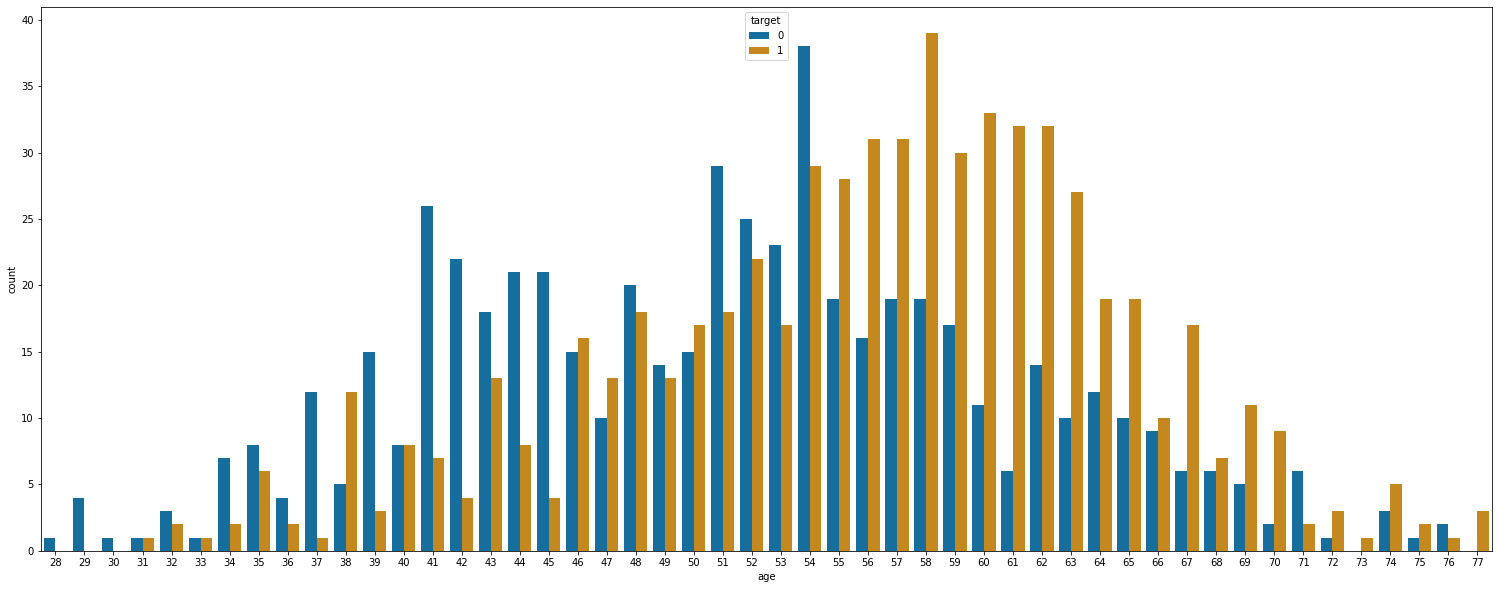

In [16]:
# Creating a new DB
cf_db = db
# Looking at how each age is affect by heart disease
plt.figure(figsize=(26, 10))
sns.countplot(data=cf_db, x='age', hue='target', palette='colorblind')

In [17]:
probability("age", "target", cf_db)

<-------------------------------------------------------------------------------------------------------------->
The amount of ppl without HD in sector 31: 1
The amount of ppl with HD in sector 31: 1
Total count in sector 31: 2
The probability of having heart disease in sector 31 is: 50.0%
The probability of not having heart disease in sector 31 is: 50.0%
<-------------------------------------------------------------------------------------------------------------->
The amount of ppl without HD in sector 32: 3
The amount of ppl with HD in sector 32: 2
Total count in sector 32: 5
The probability of having heart disease in sector 32 is: 40.0%
The probability of not having heart disease in sector 32 is: 60.0%
<-------------------------------------------------------------------------------------------------------------->
The amount of ppl without HD in sector 33: 1
The amount of ppl with HD in sector 33: 1
Total count in sector 33: 2
The probability of having heart disease in sector 33 is:

In [18]:
db['age'][0]

40

### Oldpeak

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

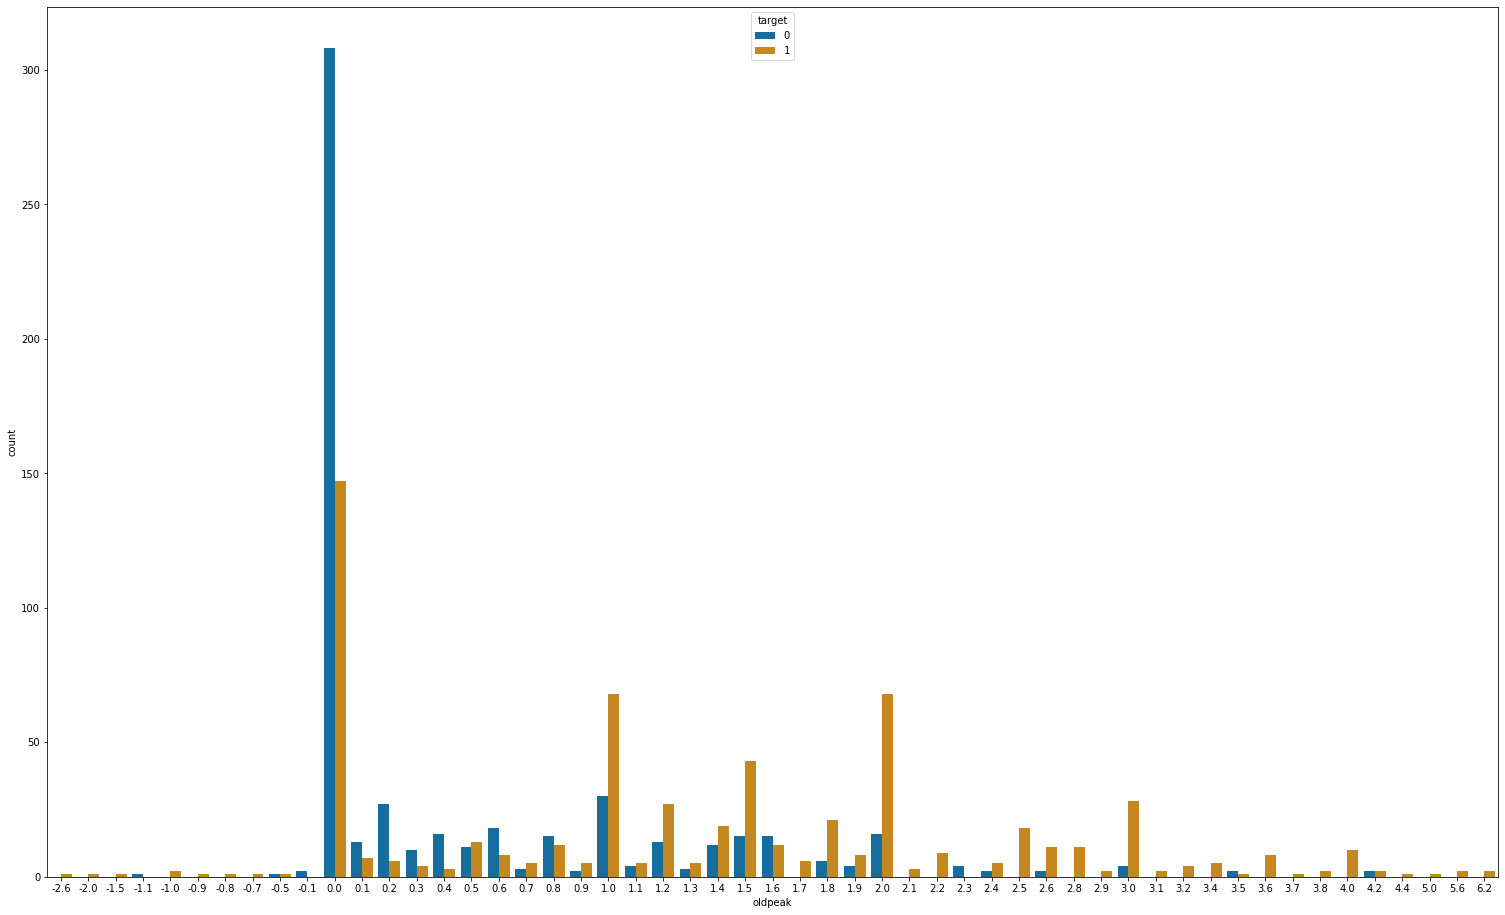

In [19]:
# Looking at how oldpeak is affect by heart disease
plt.figure(figsize=(26, 16))
sns.countplot(data=cf_db, x='oldpeak', hue='target', palette='colorblind')

### Chest Pain Type
Although this variable seems useful, it can bne a little vague since it doesn't tell what each pain level feels like or the effects each pain level has on the individual. 

<AxesSubplot:xlabel='chest pain type', ylabel='count'>

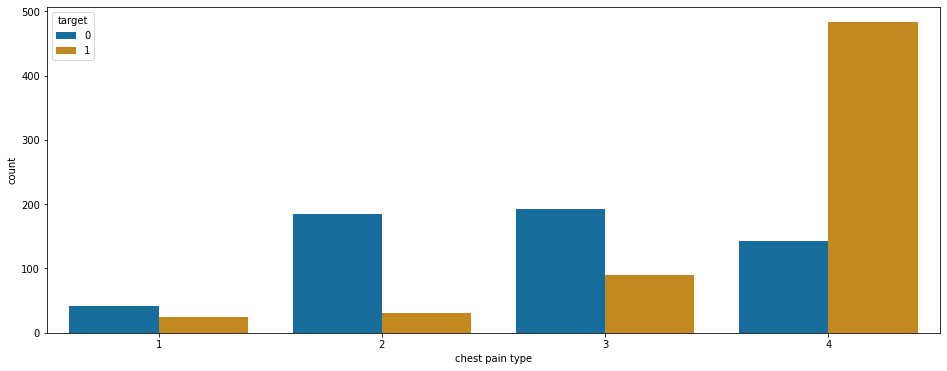

In [20]:
# Looking at how chest pain type is affect by heart disease
plt.figure(figsize=(16, 6))
sns.countplot(data=cf_db, x='chest pain type', hue='target', palette='colorblind')

In [21]:
probability("chest pain type", "target", cf_db)

<-------------------------------------------------------------------------------------------------------------->
The amount of ppl without HD in sector 1: 41
The amount of ppl with HD in sector 1: 25
Total count in sector 1: 66
The probability of having heart disease in sector 1 is: 37.88%
The probability of not having heart disease in sector 1 is: 62.12%
<-------------------------------------------------------------------------------------------------------------->
The amount of ppl without HD in sector 2: 185
The amount of ppl with HD in sector 2: 31
Total count in sector 2: 216
The probability of having heart disease in sector 2 is: 14.35%
The probability of not having heart disease in sector 2 is: 85.65%
<-------------------------------------------------------------------------------------------------------------->
The amount of ppl without HD in sector 3: 193
The amount of ppl with HD in sector 3: 90
Total count in sector 3: 283
The probability of having heart disease in sector 3 

### Exersise Angina

<AxesSubplot:xlabel='exercise angina', ylabel='count'>

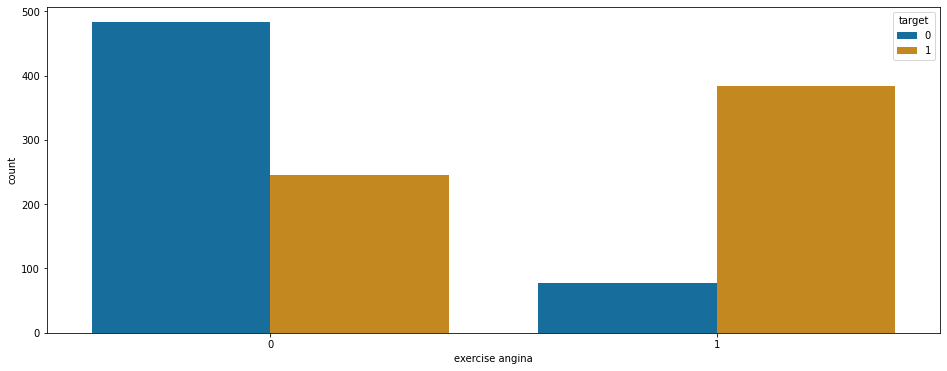

In [22]:
# Looking at how exercise angina is affect by heart disease
plt.figure(figsize=(16, 6))
sns.countplot(data=cf_db, x='exercise angina', hue='target', palette='colorblind')

In [23]:
probability("exercise angina", "target", cf_db)

<-------------------------------------------------------------------------------------------------------------->
The amount of ppl without HD in sector 1: 78
The amount of ppl with HD in sector 1: 383
Total count in sector 1: 461
The probability of having heart disease in sector 1 is: 83.08%
The probability of not having heart disease in sector 1 is: 16.92%


The sector with the heights probability of ppl without HD is sector 1 with a max    probability of 16.92
The sector with the heights probability of ppl with HD is sector 1 with a max    probability of 83.08


### ST Slope

<AxesSubplot:xlabel='ST slope', ylabel='count'>

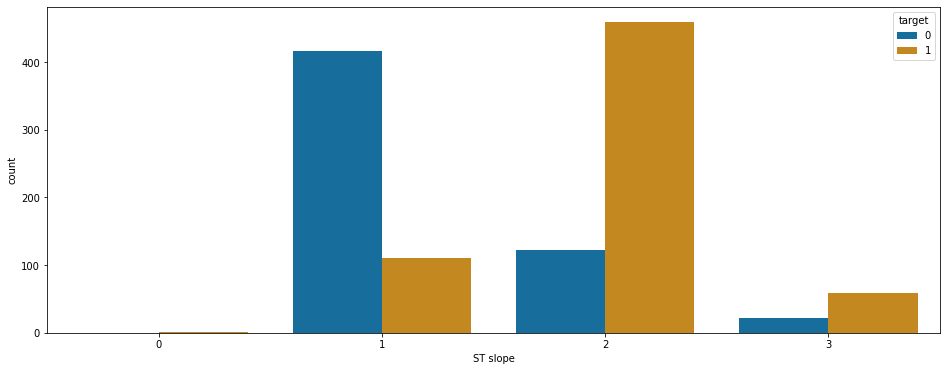

In [24]:
# Looking at how ST slope is affect by heart disease
plt.figure(figsize=(16, 6))
sns.countplot(data=cf_db, x='ST slope', hue='target', palette='colorblind')

In [25]:
probability("ST slope", "target", cf_db)

<-------------------------------------------------------------------------------------------------------------->
The amount of ppl without HD in sector 1: 416
The amount of ppl with HD in sector 1: 110
Total count in sector 1: 526
The probability of having heart disease in sector 1 is: 20.91%
The probability of not having heart disease in sector 1 is: 79.09%
<-------------------------------------------------------------------------------------------------------------->
The amount of ppl without HD in sector 2: 123
The amount of ppl with HD in sector 2: 459
Total count in sector 2: 582
The probability of having heart disease in sector 2 is: 78.87%
The probability of not having heart disease in sector 2 is: 21.13%
<-------------------------------------------------------------------------------------------------------------->
The amount of ppl without HD in sector 3: 22
The amount of ppl with HD in sector 3: 59
Total count in sector 3: 81
The probability of having heart disease in sector 

### Sex

<AxesSubplot:xlabel='sex', ylabel='count'>

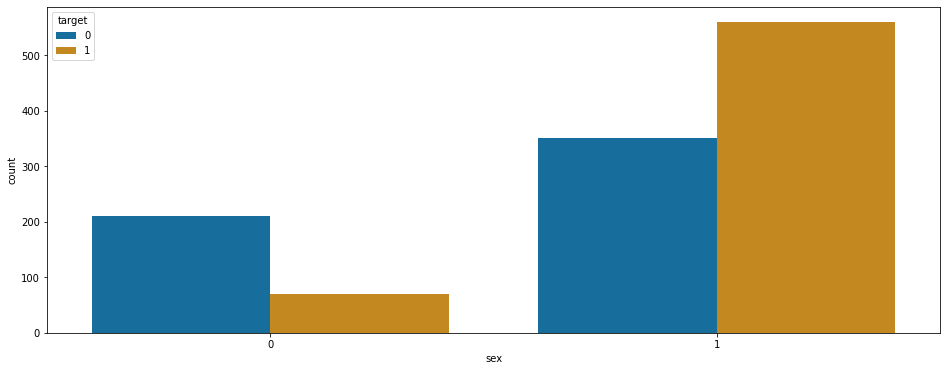

In [26]:
# Looking at how sex is affect by heart disease
plt.figure(figsize=(16, 6))
sns.countplot(data=cf_db, x='sex', hue='target', palette='colorblind')

In [27]:
probability("sex", "target", cf_db)

<-------------------------------------------------------------------------------------------------------------->
The amount of ppl without HD in sector 1: 350
The amount of ppl with HD in sector 1: 559
Total count in sector 1: 909
The probability of having heart disease in sector 1 is: 61.5%
The probability of not having heart disease in sector 1 is: 38.5%


The sector with the heights probability of ppl without HD is sector 1 with a max    probability of 38.5
The sector with the heights probability of ppl with HD is sector 1 with a max    probability of 61.5


So, the data set is <b>76.4% male</b> so there is a bais towards males in this dataset, meaing that for males, they will get more accurate results than females largely due to the population bias of the datset

## Dropping the vairables that I will not be using at ALL

In [28]:
db.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [29]:
cf_db = cf_db.drop(['cholesterol', 
                    'resting ecg', 
                    'max heart rate', 
                    'fasting blood sugar', 
                    'resting bp s'
                   ], axis=1)

cf_db.head()

,age,sex,chest pain type,exercise angina,oldpeak,ST slope,target
0,40,1,2,0,0.0,1,0
1,49,0,3,0,1.0,2,1
2,37,1,2,0,0.0,1,0
3,48,0,4,1,1.5,2,1
4,54,1,3,0,0.0,1,0


In [30]:
# Get a count of the number of patients with CVD and without
cf_db['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

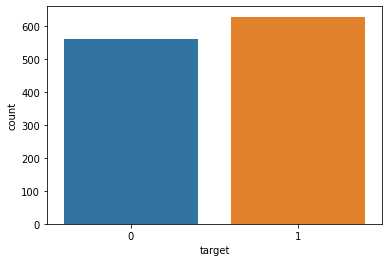

In [31]:
#Visualize the count
sns.countplot(data=cf_db, x=db['target'])

## Further Explanation

In [32]:
# Get the correlation of the columns
cf_db.corr()

,age,sex,chest pain type,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.403428,0.224106,0.276949,0.460127
exercise angina,0.188095,0.194380,0.403428,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.370772,1.000000,0.524639,0.398385
ST slope,0.237749,0.127913,0.276949,0.393408,0.524639,1.000000,0.505608
target,0.262029,0.311267,0.460127,0.481467,0.398385,0.505608,1.000000


<AxesSubplot:>

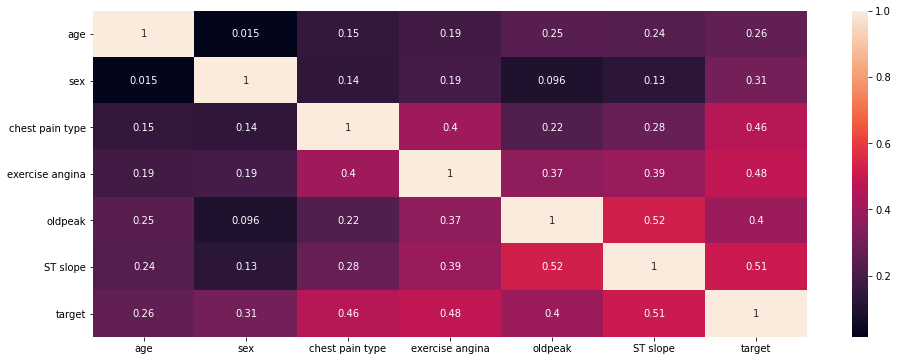

In [33]:
# Visualize Correlation
corelation = cf_db.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

# Splitting the Dataset and Preprocessing

In [34]:
# Split the data into feature data and target data
X = cf_db.iloc[:, :-1].values
Y = cf_db.iloc[:, -1].values

In [35]:
# Split the data again, into 95% training data set and 5% testing data set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.05, random_state= 1)

In [36]:
X

array([[40. ,  1. ,  2. ,  0. ,  0. ,  1. ],
       [49. ,  0. ,  3. ,  0. ,  1. ,  2. ],
       [37. ,  1. ,  2. ,  0. ,  0. ,  1. ],
       ...,
       [57. ,  1. ,  4. ,  1. ,  1.2,  2. ],
       [57. ,  0. ,  2. ,  0. ,  0. ,  2. ],
       [38. ,  1. ,  3. ,  0. ,  0. ,  1. ]])

# Building KNN Model with Pipeline

In [37]:
neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [38]:
def KNNGraphigModelAccuracy(neighbors, train_accuracy, test_accuracy, standard = False):
    highest_test_acc = 0
    best_k = 0
    # Loop over K values
    for i, k in enumerate(neighbors):
        
        if standard:
            model = Pipeline([
                  ('power',PowerTransformer()),
                  ('model',KNeighborsClassifier(n_neighbors=k))
            ])
        else:
            model = Pipeline([
                ('model',KNeighborsClassifier(n_neighbors=k))
            ])
            
        model.fit(X_train, Y_train)

        # Compute training and test data accuracy
        result_test = roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])
        result_train = roc_auc_score(Y_train,model.predict_proba(X_train)[:,1])

        train = (result_train*100)
        train_accuracy[i] = train
        test = (result_test*100)
        test_accuracy[i] = test
        if test > highest_test_acc:
            highest_test_acc = test
            best_k = k

    # Generate plot
    plt.figure(figsize=(16, 6))
    plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
    plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

    plt.legend()
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    plt.show()
    
    print(f"The highest testing Accuracy was {highest_test_acc}, with a K-value of {best_k}")


## Without Scaling or Preprocessing

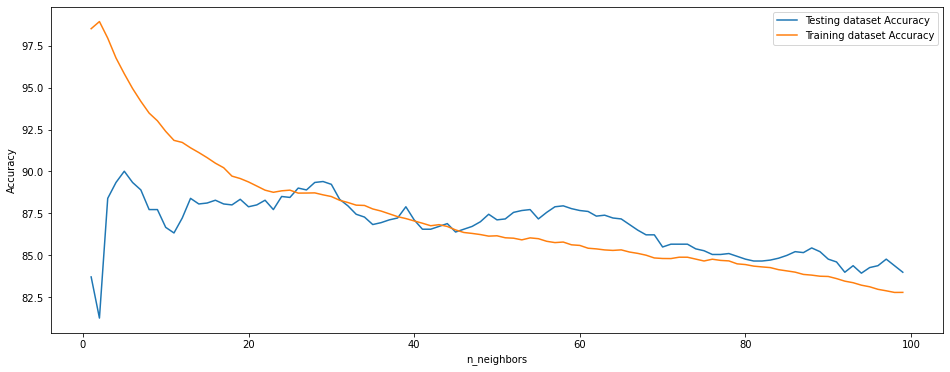

The highest testing Accuracy was 90.01116071428571, with a K-value of 5


In [39]:
KNNGraphigModelAccuracy(neighbors, train_accuracy, test_accuracy, standard = False)

## With Scaling And Preprocessing

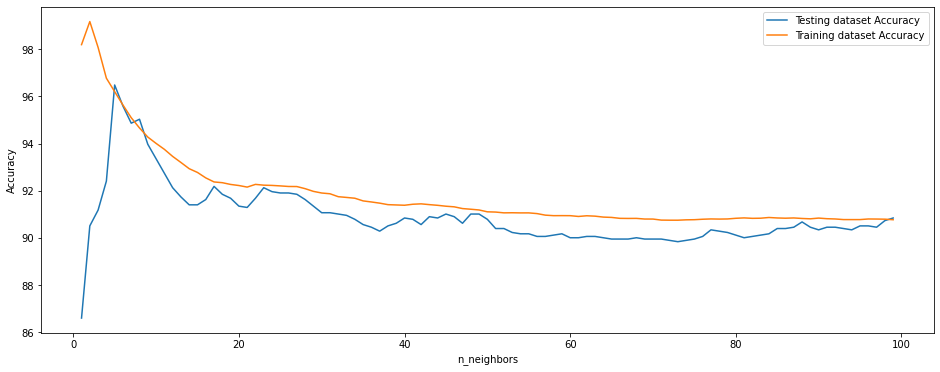

The highest testing Accuracy was 96.484375, with a K-value of 5


In [40]:
KNNGraphigModelAccuracy(neighbors, train_accuracy, test_accuracy, standard = True)

With the normalization and standardization Techniques implemented, the best accuracy achieved was roughly 96%.
However, maybe the model can be improved with some hyperparameter tuning

# Hyperparameter Tuning

In [41]:
###########################################################################################################
# The Code for this section does not belog to me.                                                         #
# The credit goes to the creator, Adipta Martulandi they can be found at the link below:                  #
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f # 
###########################################################################################################

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
model_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(model_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_train, Y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 32
Best p: 2
Best n_neighbors: 1


so based on the results of the hyperparamet testing, the best distance forumals is the Manhattan Distace (P=2) and the best value for K is 1 with a leaf_size of 32

## Building New Model Based on Hyperparameter tuning

In [42]:
# Create new KNN object
model_3 = KNeighborsClassifier(n_neighbors=1, leaf_size=32, p= 2)

# Fit the model
model_3.fit(X_train, Y_train)

# Getting the Accuracy
result_test = roc_auc_score(Y_test,model_3.predict_proba(X_test)[:,1])

result_test

0.8370535714285715

Since the model perforemed worse with hyperparamet tuing, this will not be included in the final mode. The final model will only have the added benfit of Standardization and Normalization.

# Exporting Modified MODEL

### Setting up the Model with optimal K-value

In [43]:
final_model = Pipeline([
    ('power',PowerTransformer()),
    ('model',KNeighborsClassifier(n_neighbors=5))
])
final_model.fit(X_train, Y_train)


Pipeline(steps=[('power', PowerTransformer()),
                ('model', KNeighborsClassifier())])

In [44]:
# Creating a pickle file using serialization
pickle_out = open("HeartDiseaseClassifier.pkl", "wb")

# Writing the pickle file and saving it
pickle.dump(final_model, pickle_out)

# Closing the pickle file
pickle_out.close()

In [45]:
# Opening the pickle file
pickle_in = open("HeartDiseaseClassifier.pkl", "rb")
# Saving the file as a variable for use
classifier = pickle.load(pickle_in)

# THE FEATURES BUILT AND EXPORTED WITH THE MODEL

In [46]:
cf_db.columns

Index(['age', 'sex', 'chest pain type', 'exercise angina', 'oldpeak',
       'ST slope', 'target'],
      dtype='object')